# Spam detection using Natural Language Processing

<img src='http://www.digitaljournal.com/img/7/9/9/0/2/2/i/3/8/0/o/no-spam.gif' width="400" />



The data is gathered from the [UCI datasets]( https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#) 


In this project we will do the following steps:
1. Basic Data Exploration and Visualisation
2. Text Pre-processing
    - Remove Punctuation
    - Remove Common/ Stopwords
    - Tokenization
3. Vectorization
    - Count how many times does a word occur in each message (Known as term frequency)
    - Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
    - Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


**Data Set Information:**

This corpus has been collected from free or free for research sources at the Internet: 

- A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 
- A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis. 
- Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available. 

**Attribute Information:**

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow: 

ham What you doing?how are you? 

ham Ok lar... Joking wif u oni... 

ham dun say so early hor... U c already then say... 

ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H* 

ham Siva is in hostel aha:-. 

ham Cos i was out shopping wif darren jus now n i called him 2 ask wat 
present he wan lor. Then he started guessing who i was wif n he finally 
guessed darren lor. 

spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop 

spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B 

spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU 

Note: the messages are not chronologically sorted.


### Importing the packages

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download_shell() ## Downloading the stopwords package from NLTK

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\AJI\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages=[line.rsplit() for line in open('SMSSpamCollection')] ## Geting the glimpse of the dataset

In [4]:
len(messages)

5574

In [5]:
messages[40]

['ham',
 'Pls',
 'go',
 'ahead',
 'with',
 'watts.',
 'I',
 'just',
 'wanted',
 'to',
 'be',
 'sure.',
 'Do',
 'have',
 'a',
 'great',
 'weekend.',
 'Abiola']

In [6]:
for mes_no, message in enumerate(messages[:10]):
    print(mes_no,message)
    print('/n')

0 ['ham', 'Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']
/n
1 ['ham', 'Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']
/n
2 ['spam', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18's"]
/n
3 ['ham', 'U', 'dun', 'say', 'so', 'early', 'hor...', 'U', 'c', 'already', 'then', 'say...']
/n
4 ['ham', 'Nah', 'I', "don't", 'think', 'he', 'goes', 'to', 'usf,', 'he', 'lives', 'around', 'here', 'though']
/n
5 ['spam', 'FreeMsg', 'Hey', 'there', 'darling', "it's", 'been', '3', "week's", 'now', 'and', 'no', 'word', 'back!', "I'd", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'to', 'send,', 'Â£1.50', 'to', 'rcv']
/n
6 ['ham', 'Even', 'my', 'brothe

In [7]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length']=messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualisation

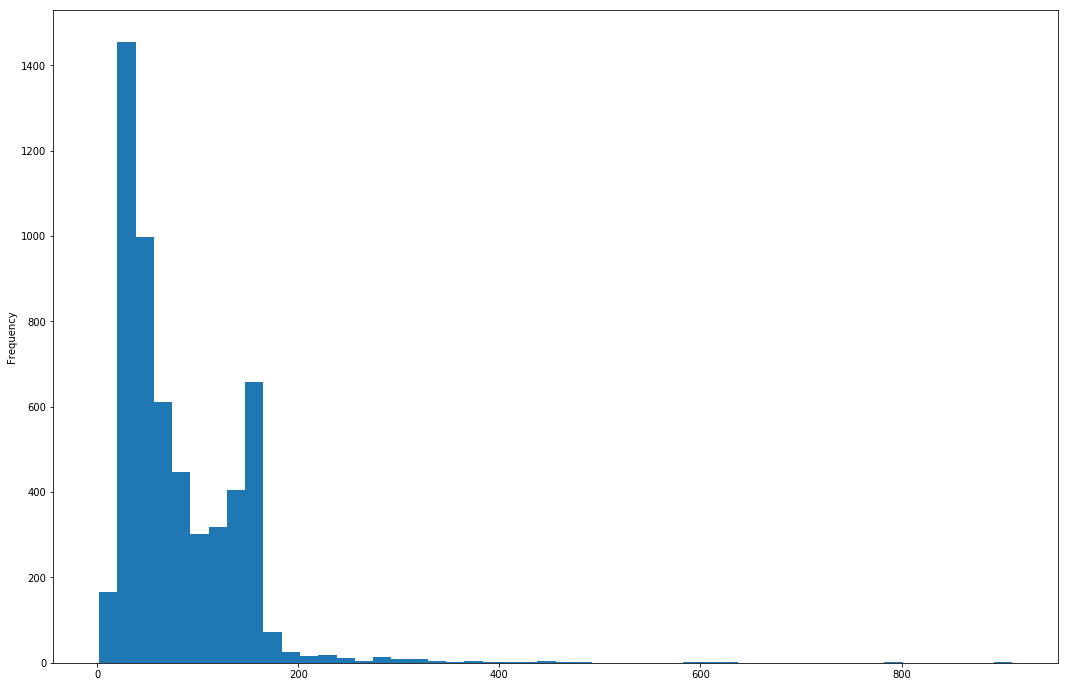

In [13]:
plt.figure(figsize=(18,12))
messages['length'].plot(bins=50, kind='hist') 

Some messages are seen to have a length of more than 800

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

To check the longest message

In [15]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FC8D046A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021FC8D35DA0>], dtype=object)

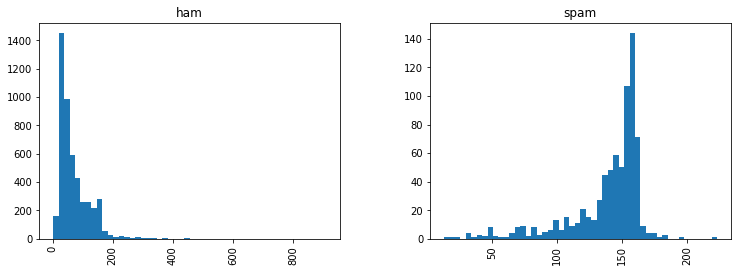

In [16]:
plt.figure(figsize=(12,7))
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

Through just basic EDA we have been able to discover a trend that spam messages tend to have more characters.

## Text Preprocessing

There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers) and remove the stop words or common words which doesnot convey any particular meaning


In [17]:
import string
from nltk.corpus import stopwords

Function to remove the punctuation and stopwords 

In [18]:
def textprocess(mess):
    nopunc=[char for char in mess if char not in string.punctuation] # Removing Punctuation
    
    nopunc=''.join(nopunc) # Joining the string
    
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # removing stopwords
    

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Next step we will **Tokenize** these messages.

Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [20]:
messages['message'].head(5).apply(textprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization 

The bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


**The First Step**

Using sklearn's **CountVectorizer** model we will convert a collection of text documents to a matrix of token counts.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
bag_Of_Words_transformer = CountVectorizer(analyzer=textprocess).fit(messages['message'])



In [23]:
print(len(bag_Of_Words_transformer.vocabulary_))

11425


In [24]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [25]:
bow4 = bag_Of_Words_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


This means that there are seven unique words in message number 4 
Two of them appear twice, the rest only once. 

In [26]:
print(bag_Of_Words_transformer.get_feature_names()[4068])
print(bag_Of_Words_transformer.get_feature_names()[9554])

U
say


So 'U' and 'say' are the two words

Now convert the entire dataframe

In [27]:
messages_bag_of_words = bag_Of_Words_transformer.transform(messages['message'])

In [28]:
print('Shape of Sparse Matrix: ', messages_bag_of_words.shape)
print('Amount of Non-Zero occurences: ', messages_bag_of_words.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [29]:
sparsity = (100.0 * messages_bag_of_words.nnz / (messages_bag_of_words.shape[0] * messages_bag_of_words.shape[1]))
print(f'sparsity:{sparsity}')

sparsity:0.07940295412668218


### Second and Third Step

After the counting, the term weighting and normalization can be done with **TF-IDF**

**term frequency-inverse document frequency**

**Term Frequency** 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bag_of_words)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


Let's find the IDF of 'u' and 'university'

In [31]:
print(tfidf_transformer.idf_[bag_Of_Words_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bag_Of_Words_transformer.vocabulary_['university']])

3.28005242674
8.5270764989


In [32]:
messages_tfidf = tfidf_transformer.transform(messages_bag_of_words)
print(messages_tfidf.shape)

(5572, 11425)


## Model

Using the Naive Bayes classifier we will classify spam vs ham


### Spliting the dataset to Train and Test sets

In [33]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test =train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


### Creating a data pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=textprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [35]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function textprocess at 0x0000021FC90B3A60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [36]:
predictions = pipeline.predict(msg_test)

### Classification Report

<img 
src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [37]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98       997
       spam       0.74      1.00      0.85       118

avg / total       0.97      0.96      0.97      1115



In [38]:
print(confusion_matrix(predictions,label_test))

[[956  41]
 [  0 118]]
